In [65]:
from DatasetGenerator import DatasetGenerator
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
dataset_generator = DatasetGenerator()

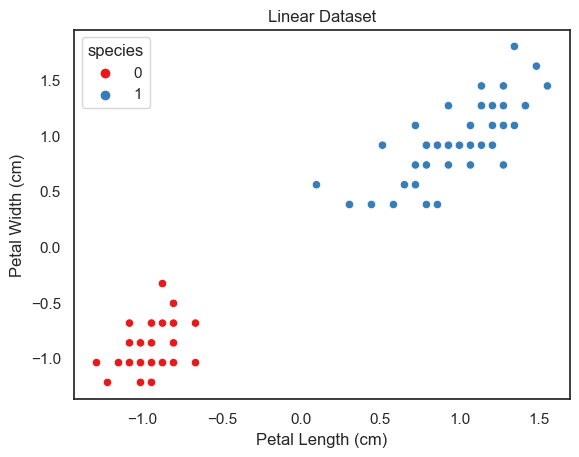

In [67]:
linear_dataset = dataset_generator.get_linear_dataset()
sns.set(style="white", palette="muted")
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="species", data=linear_dataset, palette="Set1", marker="o")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Linear Dataset")
plt.show()

In [68]:
column_names = linear_dataset.columns
print("Column Names:", column_names)
unique_values = linear_dataset['species'].unique()
print("Unique Values:", unique_values)

Column Names: Index(['species', 'petal length (cm)', 'petal width (cm)'], dtype='object')
Unique Values: [0 1]


In [70]:
def plot_svm (clf, X_train, y_train, X_test, y_test):
    x0s = np.linspace(min(X_train[:,0])-0.5,max(X_train[:,0])+0.5, 100)
    x1s = np.linspace(min(X_train[:,1])-0.5,max(X_train[:,1])+0.5, 100)
    x0, x1 = np.meshgrid(x0s,x1s) 
    X_mesh = np.c_[x0.ravel(), x1.ravel()] 
    y_pred = clf.predict(X_mesh).reshape(x0.shape) 
    y_decision = clf.decision_function(X_mesh).reshape(x0.shape)

    plt.figure(figsize=(16, 9)) 
    plt.scatter(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], s=80, c="g", label="Class 0")
    plt.scatter(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], s=80, c="b", label="Class 1")
    plt.scatter(X_test[:, 0][y_test==0], X_test[:, 1][y_test==0], s=80, c="g")
    plt.scatter(X_test[:, 0][y_test==1], X_test[:, 1][y_test==1], s=80, c="b")

    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, c="r", label="Support Vectors")

    plt.contourf(x0,x1, y_pred, cmap = plt.cm.brg, alpha = 0.1)
    plt.contourf(x0,x1, y_decision, cmap = plt.cm.brg, alpha = 0.2)
    plt.contour(x0, x1, y_decision, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.legend(loc="lower right")
    plt.axis("auto")
    plt.grid(True, which='both')
    plt.xlabel("x1")
    plt.ylabel("x2") 

In [1]:
def tune(model, params, X_train, y_train):
    rnd_search = RandomizedSearchCV(model, param_distributions =params, n_iter = 50, cv = 5, random_state=40)
    rnd_search.fit(X_train, y_train)
    print("best hyper-parameter value: ", rnd_search.best_params_)
    best_model = rnd_search.best_estimator_
    return best_model

In [72]:
X = np.array(linear_dataset[['petal length (cm)', 'petal width (cm)']].values)
y = np.array(linear_dataset['species'].to_list())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(kernel='linear')
parameters={"C": uniform(0,20)}
best_model = tune(model, parameters, X_train, y_train)

best hyper-parameter value:  {'C': 8.153740561605723}


In [73]:
y_pred = best_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [74]:
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Confusion Matrix:
[[12  0]
 [ 0  8]]


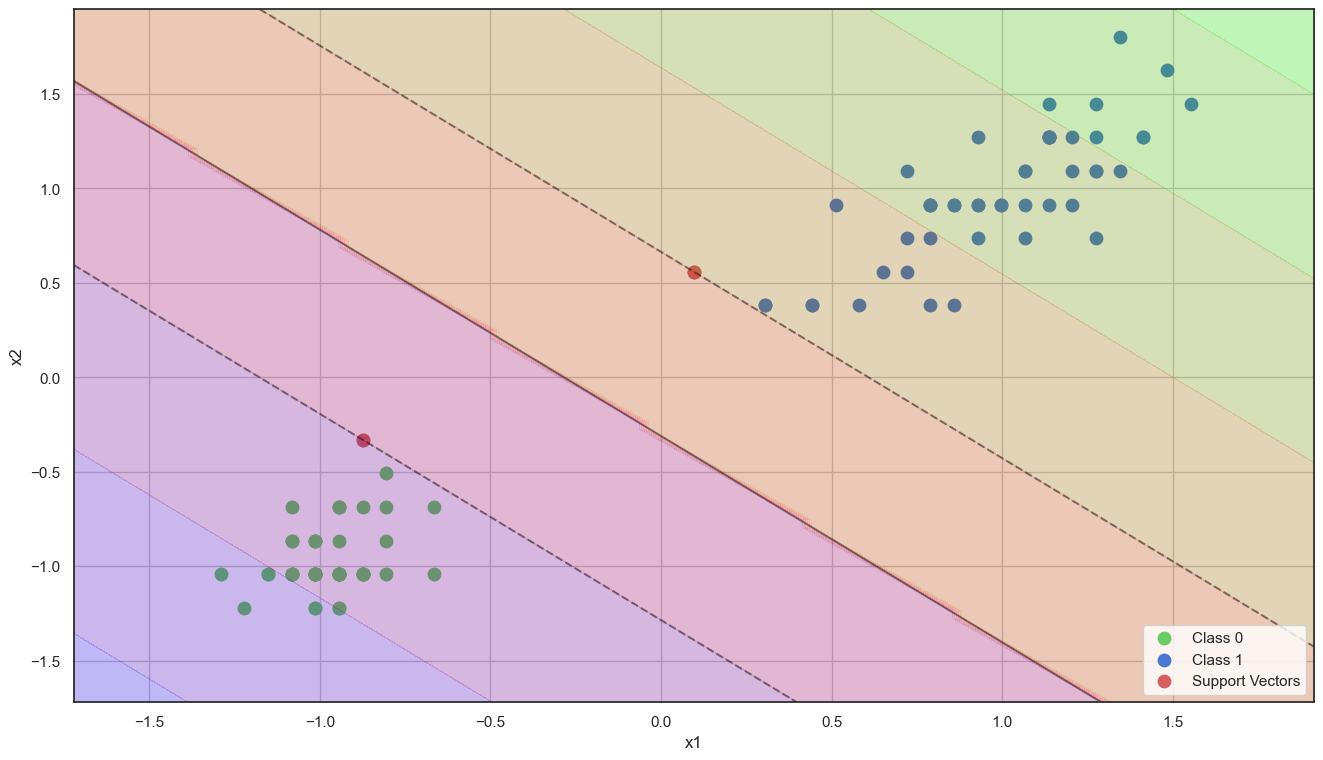

In [75]:
#with best C value
plot_svm (best_model, X_train, y_train, X_test, y_test)

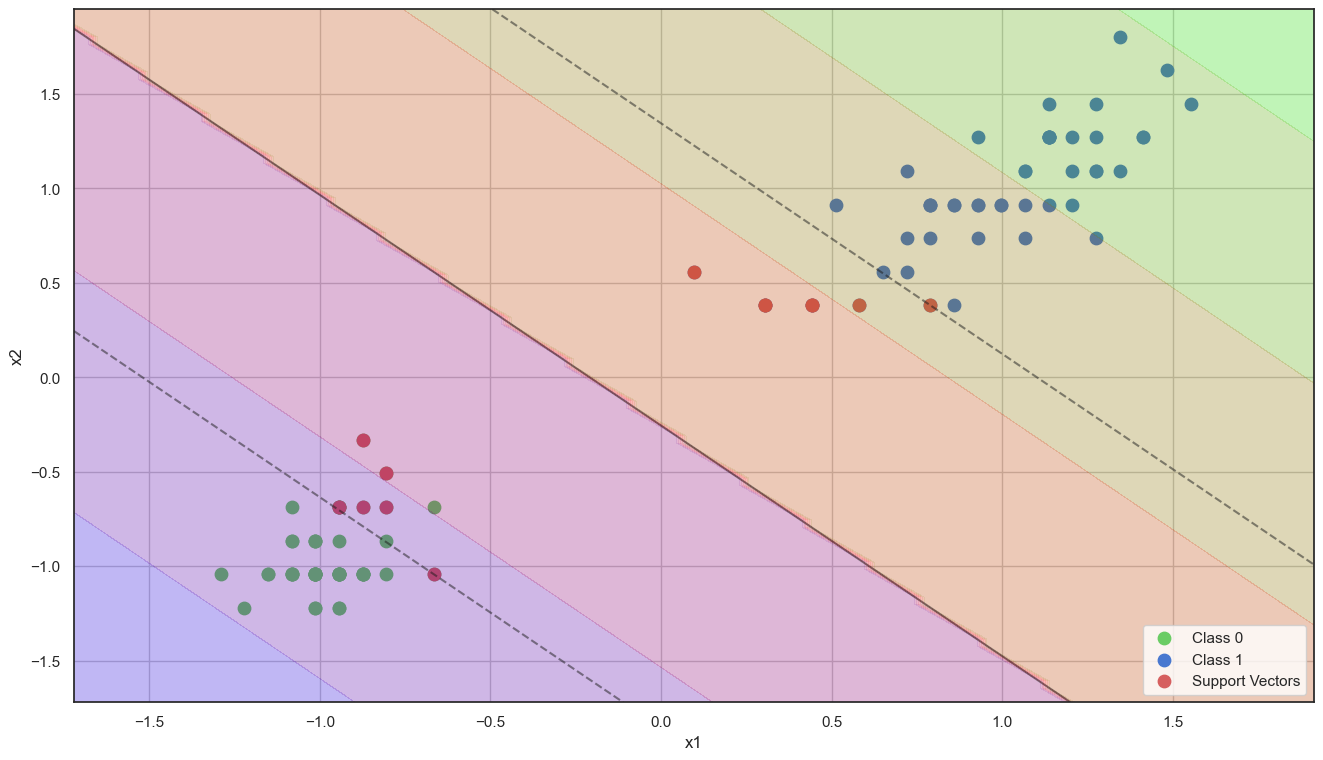

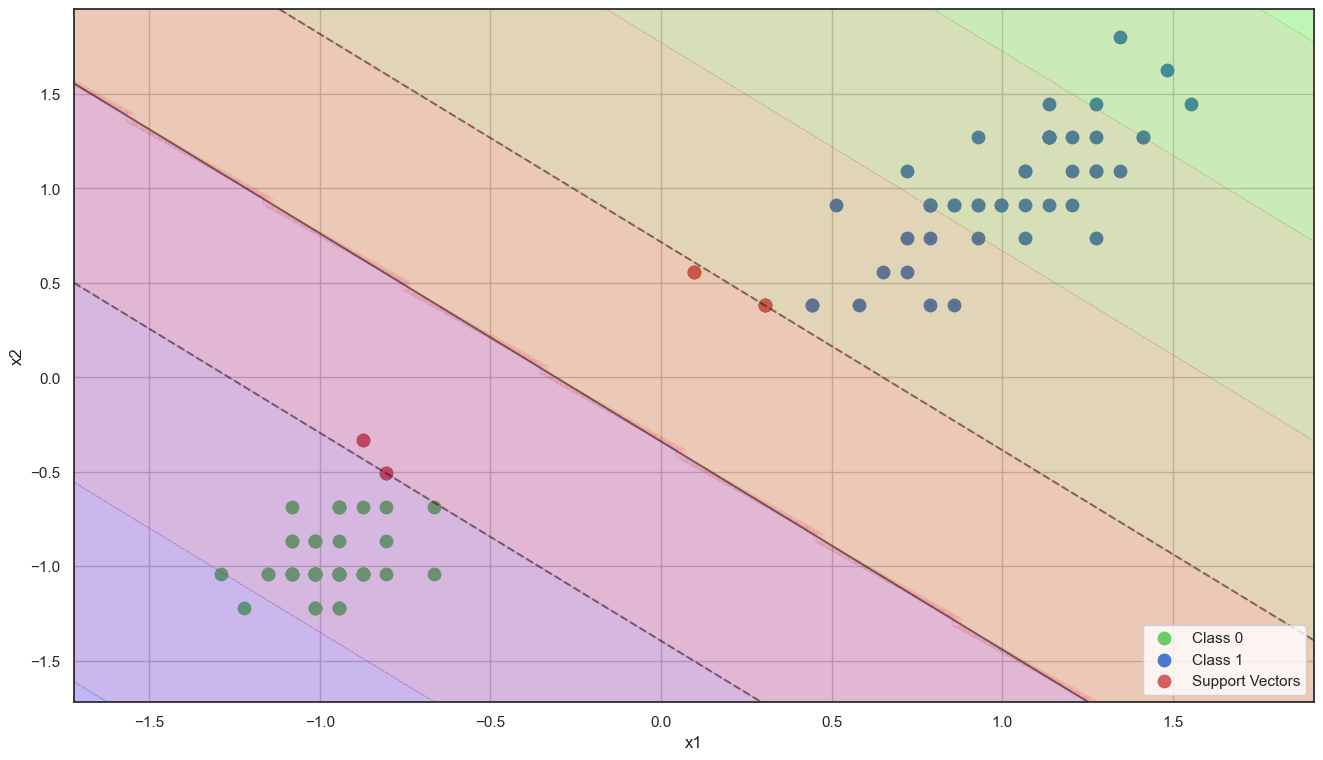

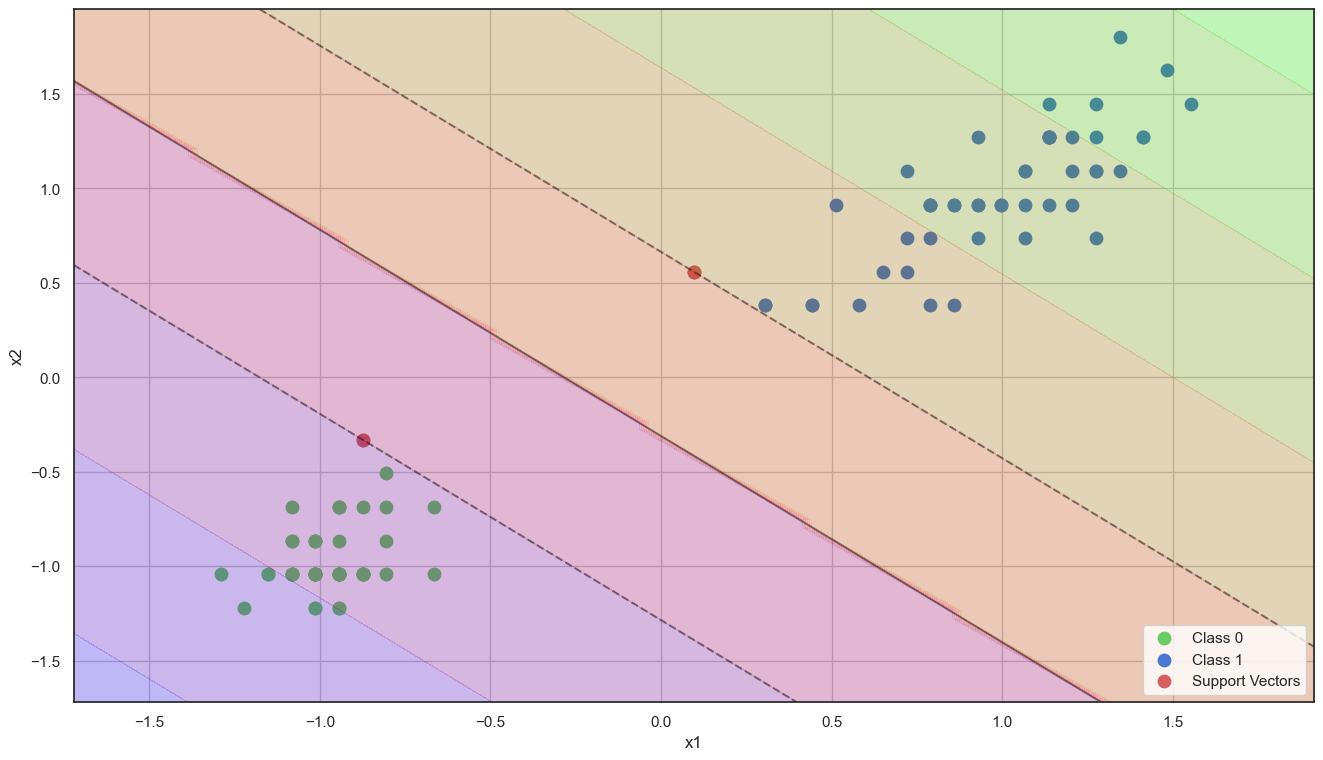

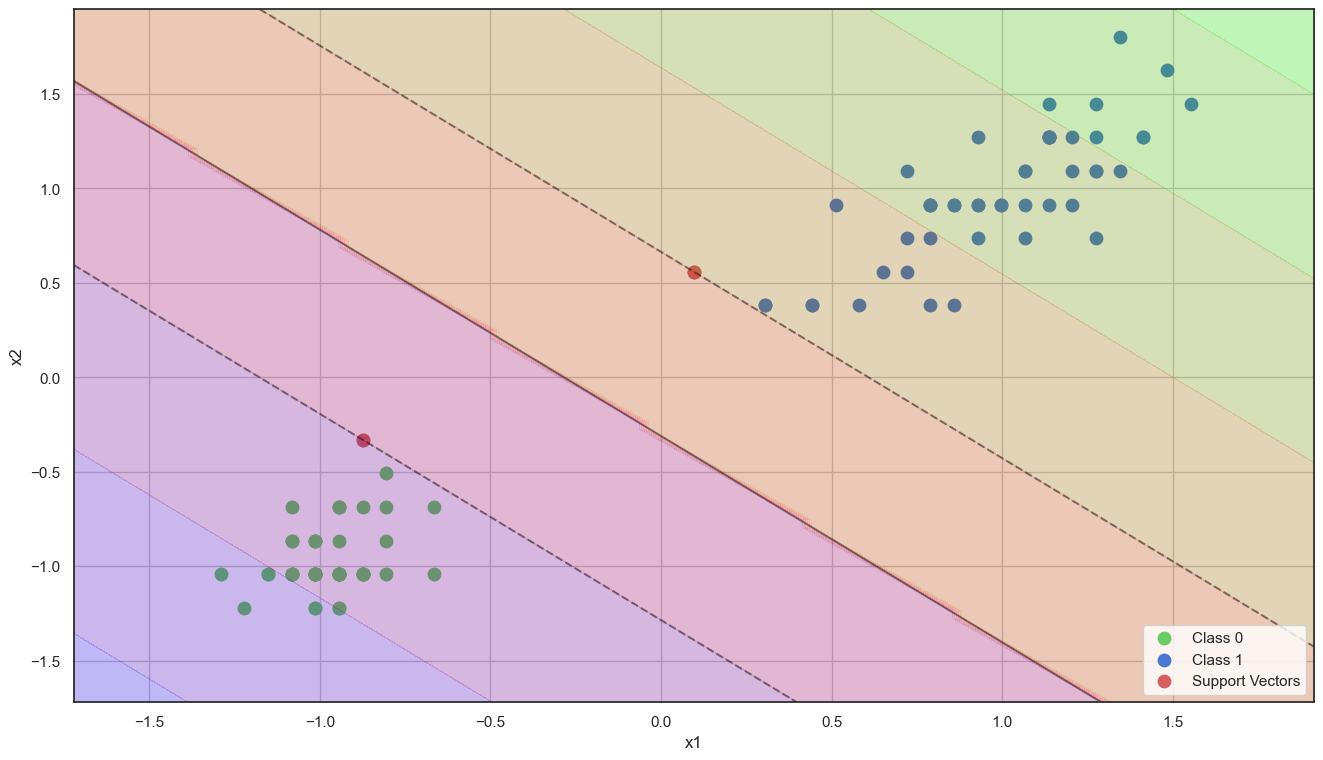

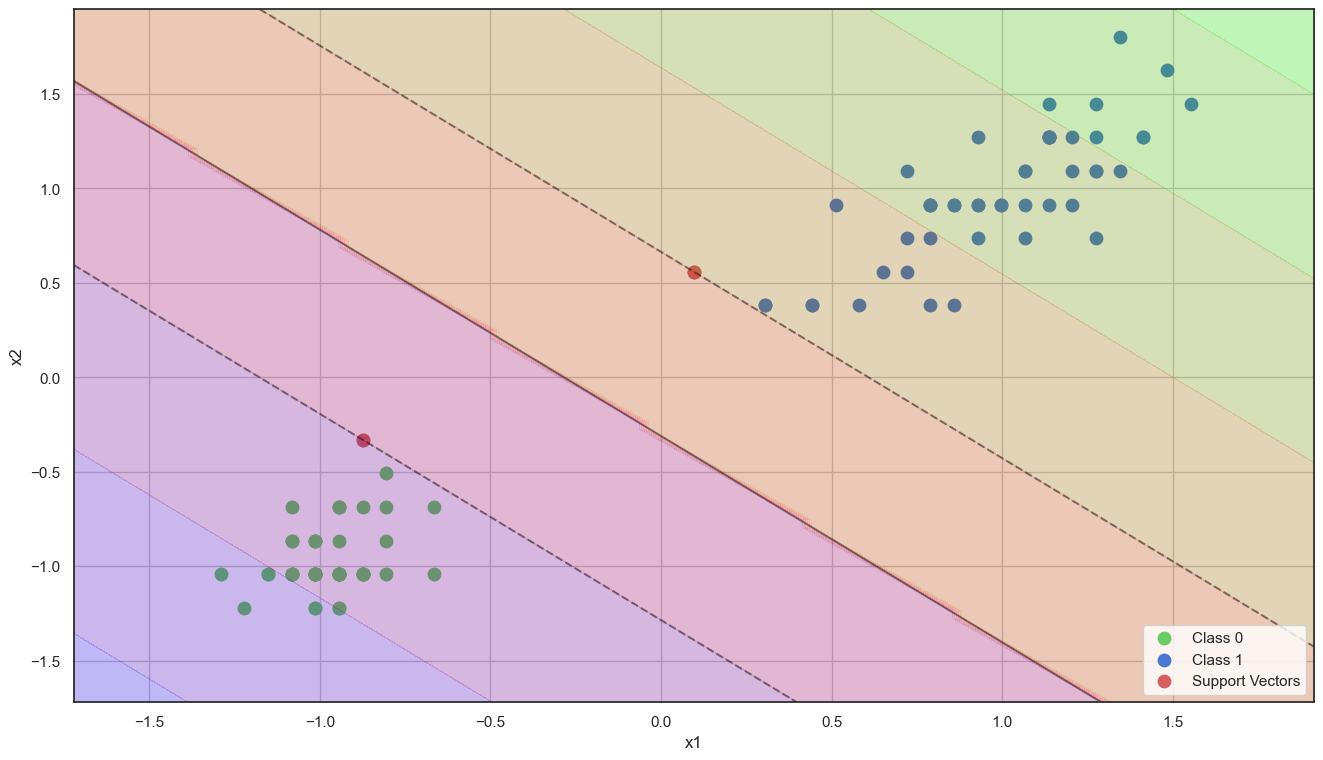

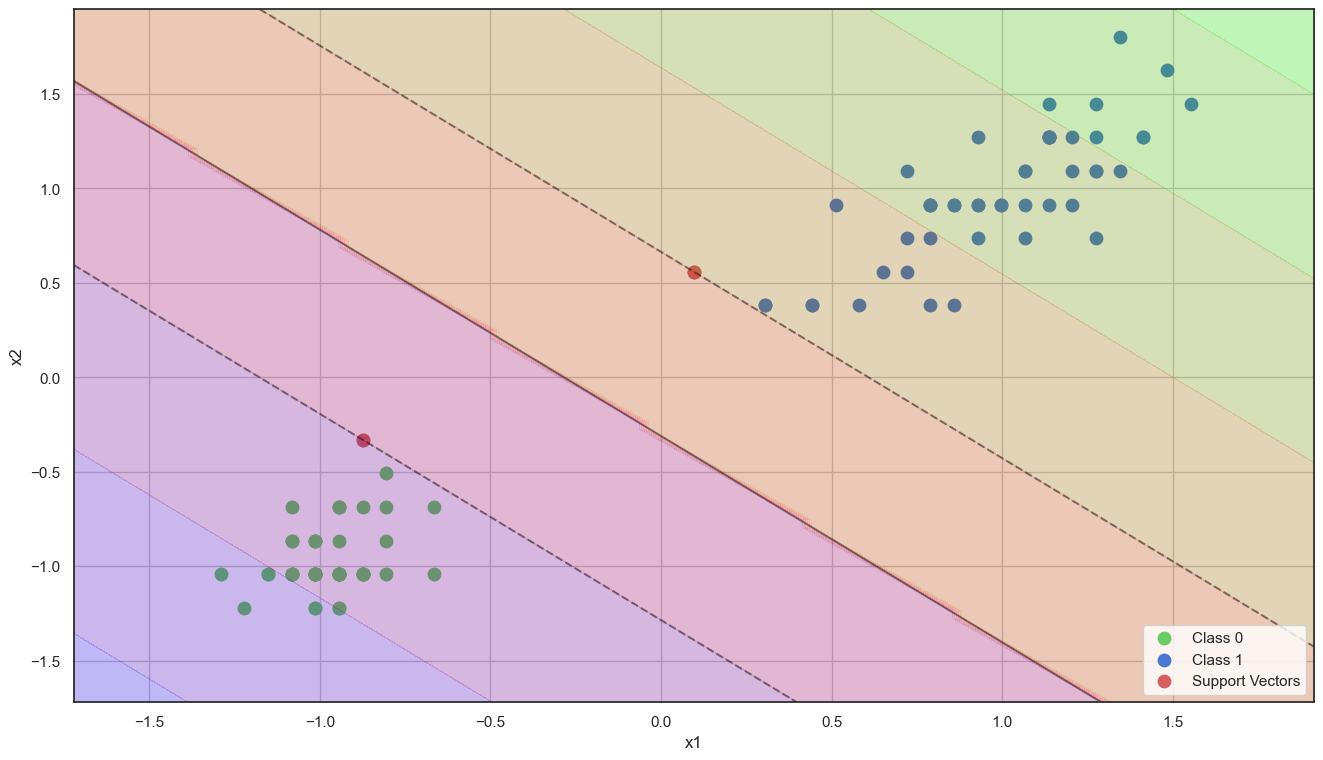

In [84]:
C_values = [0.1, 1, 5, 10, 15, 20]
for C_val in C_values:
    model = SVC(kernel='linear')
    model.C = C_val
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_svm(model, X_train, y_train, X_test, y_test)

What is parameter C:

Role of C in SVC: In Support Vector Machines, C controls the trade-off between achieving a low training error and a low testing error that is, the trade-off between keeping the training set classification as accurate as possible and limiting the complexity of the decision surface. 
1.  A low value of C makes the decision surface smooth, while a high value of C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.
2. Effect of Different Values:
    + Low C: A low C encourages the model to find a larger margin decision surface, even if that surface misclassifies more points. This can lead to a simpler model that generalizes better but may have lower performance on training data.
    + High C: A high C tries to minimize the number of misclassified examples due to the higher penalty, leading to a more complex model that might fit the training data better but could also lead to overfitting.